# Workspace Setup

In [ ]:
#@title Setup workspace

# Code necessary to visualize gymnasium environments
! pip install gymnasium[accept-rom-license,atari,mujoco,box2d,classic-control]==1.0.0
! pip install ale-py
! pip install pyvirtualdisplay
! sudo apt-get install -y xvfb ffmpeg
!pip install swig
!pip install Box2D
!pip install box2d-kengz
!pip install pygame
!pip install ale_py
!pip install pyglet

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

!pip install -U colabgymrender
!pip install imageio==2.37.0
!pip install atari_py
!pip install --upgrade AutoROM
!AutoROM --accept-license

!wget http://www.atarimania.com/roms/Roms.rar
!unrar x -o+ /content/Roms.rar >/dev/nul
!python -m atari_py.import_roms /content/ROMS >/dev/nul

!pip install --upgrade gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 17.7 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (box2d-py)
Reading package lists... Done
Building de

  Preparing metadata (setup.py) ... done
  Created wheel for colabgymrender: filename=colabgymrender-1.1.0-py3-none-any.whl size=3197 sha256=f0967b4e57d97306cc76eaaddc085693bd3a4f5738b7651a2b27383b4a141ffd
  Stored in directory: /root/.cache/pip/wheels/e9/37/bf/9c1ac0662b9354c4928c2379dc60606682775c3d4ef7077708
Successfully built colabgymrender
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.6/540.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for atari_py: filename=atari_py-0.2.9-cp311-cp311-linux_x86_64.whl size=2871850 sha256=b5f92a0ee9b20d001021ab25c45776bff1e979a0c7c0cba618de37ab882098a6
  Stored in directory: /root/.cache/pip/wheels/88/bb/c9/355a2560e9a75e6800cd54c37a19ca22badc1cf6a8b4a34c1b
Successfully built atari_py
AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.11/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.
Installed /usr/local/lib/python3.11/dist-packages/AutoROM/roms/adven

In [ ]:
#@title Video Recording Utility Functions

# Borrowed from https://github.com/hom-bahrani/Gymnasium-Colaboratory-Starter/blob/main/gymnasium_colab_starter.ipynb
import glob, io, base64, uuid, os
from IPython.display import HTML
from IPython import display as ipythondisplay
import gymnasium as gym
from gymnasium import logger as gymlogger
from gymnasium.wrappers.rendering import RecordVideo
from moviepy.editor import VideoFileClip, concatenate_videoclips
from natsort import natsorted

from pyvirtualdisplay.display import Display
display = Display(visible=False, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video(folder_name):
  # remove an output.mp4 if it exists.
  if os.path.exists(f'{folder_name}/output.mp4'):
    os.remove(f'{folder_name}/output.mp4')
  # join all mp4 segments together in order into a single video.
  L = []
  for root, dirs, files in os.walk(folder_name):
    files = natsorted(files)
    for file in files:
        if os.path.splitext(file)[1] == '.mp4':
            filePath = os.path.join(root, file)
            # print(f"adding file : {filePath}")
            video = VideoFileClip(filePath)
            L.append(video)
  final_clip = concatenate_videoclips(L)
  final_clip.to_videofile(f"{folder_name}/output.mp4", fps=50, remove_temp=False)

  # render the video to be watched.
  mp4list = glob.glob(f'{folder_name}/output.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>
'''.format(encoded.decode('ascii'))))
  else:
    print("Could not find video")

def wrap_env(env, folder_name):
  env = RecordVideo(env, folder_name, video_length=1000, disable_logger=True)
  return env

def create_environment(name):
    folder_name = f"./video/{name}/{uuid.uuid4()}"
    env = wrap_env(gym.make(name, render_mode="rgb_array"), folder_name)
    spec = gym.spec(name)
    # print environment details.
    print(f"Environment Name: {spec.id}")
    print(f"Action Space: {env.action_space}")
    print(f"Observation Space: {env.observation_space}")
    print(f"Max Episode Steps: {spec.max_episode_steps}")
    print(f"Nondeterministic: {spec.nondeterministic}")
    print(f"Reward Threshold: {spec.reward_threshold}")
    return env, folder_name

def display_lunarlander_video(path: str) -> HTML:
    """
        Displays a LunarLander evaluation video inside a Colab notebook

        params:
        - path : The path to the video file

        returns:
        - An HTML object to embed and display the video inline
    """
    mp4 = open(path,'rb').read()
    data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
    return HTML(f"""<video width=600 controls><source src="{data_url}" type="video/mp4"></video>""")

  if event.key is 'enter':



In [ ]:
#@title Mount G Drive
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


# DDQN
This is the DDQN implementation for the LunarLander environment.

  saveable.load_own_variables(weights_store.get(inner_path))



Environment Name: LunarLander-v3
Action Space: Discrete(4)
Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Max Episode Steps: 1000
Nondeterministic: False
Reward Threshold: 200
New best score: -335.95118031162474
Episode 0: Episode Score: -335.95118031162474 | Mean Score: -335.95118031162474 | Elapsed: 0.09492933750152588 minutes
New best score: -204.27954131550968
New best score: -81.2591359719786
Episode 5: Episode Score: -81.2591359719786 | Mean Score: -296.7586789346836 | Elapsed: 0.32812769412994386 minutes
New best score: -64.61564932702447
New best score: -47.553382427127886
Episode 10: Episode Score: -130.15596580350237 | Mean Score: -266.2811240463256 | Elapsed: 1.237526790301005 minutes
New best score: 207.5069741276189
Episode 15: Episode Score: -83.77221821144903 | Mean Score: -196.33772538645252 | Elapsed: 2

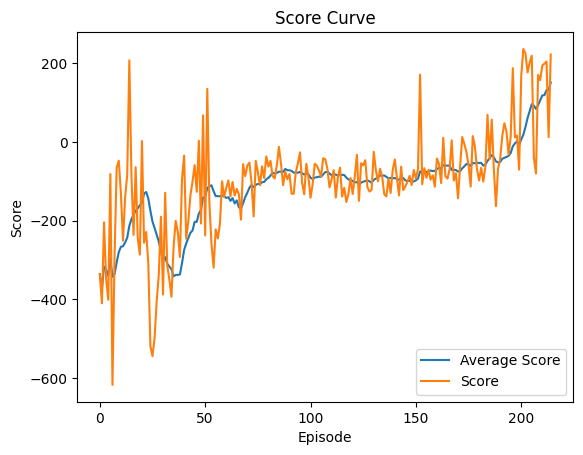

Episode 5: Episode Score: -195.2180922345594 | Mean Score: 7.677705537991346 | Elapsed: 12.399032831192017 seconds
Episode 10: Episode Score: -5.118504052440329 | Mean Score: 81.60715793597006 | Elapsed: 17.781639337539673 seconds
Average evaluation score: 81.60715793597006


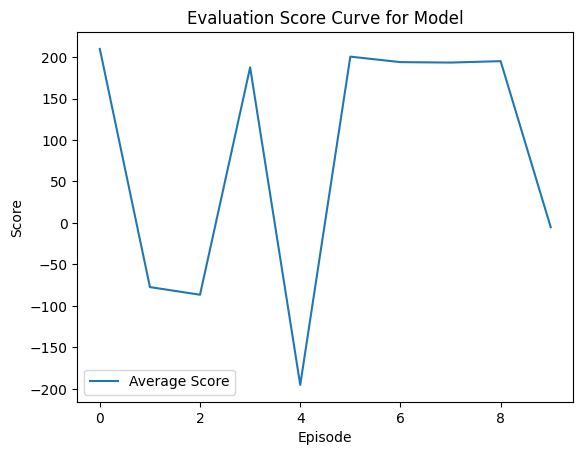

In [ ]:
#@title DDQN Model Training
from copy import deepcopy
import keras
from keras.layers import Dense, Input, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, AdamW
import gymnasium as gym
import numpy as np
import random
import tensorflow as tf
import collections
import time
import matplotlib.pyplot as plt

gdrive_path='/content/gdrive/MyDrive/Colab Notebooks/DRL/project/models'

class Memory(object):
  """
  Class to hold the replay memory for the agent to use.
  """
  def __init__(self, capacity: int):
    self.capacity = capacity
    self.buffer = collections.deque(maxlen=self.capacity)
    self.memory = collections.namedtuple("transitions", field_names=["state", "action", "reward", "next_state", "done"])

  def add(self, state, action, reward, next_state, done):
    """
    Add the given observation to memory.
    """
    self.buffer.append(self.memory(state, action, reward, next_state, done))

  def sample(self, batch_size: int):
    """
    Sample a random batch of transitions from the replay memory.
    """
    sample = random.sample(self.buffer, batch_size)

    states = np.array([s.state for s in sample]).astype(float)
    actions = np.array([s.action for s in sample]).astype(int)
    rewards = np.array([s.reward for s in sample]).astype(float)
    next_states = np.array([s.next_state for s in sample]).astype(float)
    dones = np.array([s.done for s in sample]).astype(int)

    return states, actions, rewards, next_states, dones

  def ordered_sample(self):
    """
    Return the contents of the memory in the order it was observed
    """
    sample = list(self.buffer)

    states = np.array([s.state for s in sample]).astype(float)
    actions = np.array([s.action for s in sample]).astype(int)
    rewards = np.array([s.reward for s in sample]).astype(float)
    next_states = np.array([s.next_state for s in sample]).astype(float)
    dones = np.array([s.done for s in sample]).astype(int)

    return states, actions, rewards, next_states, dones

  def clear(self):
    """
    clear the memory of all experiences
    """
    self.buffer.clear()

class DDQN():
  """
  Double Deep Q Network
  """
  def __init__(self, env: gym.Env,
               num_layers: int = 3,
               num_neurons: int = [128,128,128],
               epsilon: float = 0.1,
               epsilon_decay: float = 0.995,
               epsilon_min: float = 0.01,
               gamma: float = 0.99,
               tau: float = 5e-3,
               optimizer: keras.optimizers.Optimizer = Adam,
               dropout: bool = False,
               batch_normalization = False,
               memory_capacity: int = 100000,
               batch_size: int = 32):
    self.env = env
    self.epsilon = epsilon
    self.epsilon_decay = epsilon_decay
    self.epsilon_min = epsilon_min
    self.gamma = gamma
    self.tau = tau
    self.num_layers = num_layers
    self.num_neurons = num_neurons
    self.optimizer = optimizer
    self.batch_size = batch_size
    self.dropout = dropout
    self.batch_normalization = batch_normalization
    self.memory = Memory(memory_capacity)
    # The below models are our Q^A and Q^B functions
    self.model = self.create_model()
    self.target_model = deepcopy(self.model)

  def create_model(self) -> keras.Model:
    model = Sequential()
    model.add(Input(shape=(self.env.observation_space.shape[0],)))
    for i in range(self.num_layers):
      model.add(Dense(self.num_neurons[i], activation='relu'))
      if self.batch_normalization:
        model.add(BatchNormalization())
      if self.dropout:
        model.add(Dropout(0.15))
    model.add(Dense(self.env.action_space.n, activation='linear'))

    model.compile(loss='huber', optimizer=self.optimizer)
    return model

  def epsilon_greedy_action(self, state):
    if np.random.random() < self.epsilon:
      # random action; explore
      return self.env.action_space.sample()
    else:
      # greedy on-policy action
      # Reshape the state array to have a batch dimension of 1
      state = state.reshape(1, -1)
      return np.argmax(self.model.predict_on_batch(state))

  def save(self, state, action, reward, next_state, done):
    self.memory.add(state, action, reward, next_state, done)

  def save_model(self, checkpoint=True):
    """
        params:
        checkpoint : Whether to save the model as a checkpoint or best performing model
    """
    model_paths = {f"{gdrive_path}/ddqn/model.keras":self.model,
                   f"{gdrive_path}/ddqn/target_model.keras":self.target_model}
    for path, model in model_paths.items():
      if not checkpoint:
        path = path.replace('model.keras', 'model_best.keras')
      os.makedirs(os.path.dirname(path), exist_ok=True)
      model.save(path)

  def load_models(self, checkpoint=True):
    """
        Load saved model and target model from Google Drive.

        params:
        checkpoint : Whether to load the model as a checkpoint or best performing model
    """
    if checkpoint:
      model_fname = "model.keras"
    else:
      model_fname = "model_best.keras"
    model_path = f"{gdrive_path}/ddqn/{model_fname}"
    target_model_path = f"{gdrive_path}/ddqn/target_{model_fname}"

    self.model = keras.models.load_model(model_path)
    self.target_model = keras.models.load_model(target_model_path)

  def decay_epsilon(self):
    """
    We decay epsilon to decrease exploration over time.
    """
    self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

  def replay(self, update_target: bool = False):
    if len(self.memory.buffer) > self.batch_size:
      states, actions, rewards, next_states, dones = self.memory.sample(self.batch_size)

      q_values = self.model.predict_on_batch(states)
      q_values_next = self.model.predict_on_batch(next_states)
      q_target = self.target_model.predict_on_batch(next_states)

      index = np.arange(self.batch_size)
      q_values[index, actions] = rewards + (1 - dones) * self.gamma * q_target[index, np.argmax(q_values_next[index], axis=1)]

      self.model.fit(states, q_values, verbose=0)

      self.decay_epsilon()

      # soft update the target network
      # print("Updating target model")
      new_tgt_weights = []
      for online_w, tgt_w in zip(self.model.get_weights(), self.target_model.get_weights()):
          new_tgt_weights.append(self.tau * online_w + (1 - self.tau) * tgt_w)
      self.target_model.set_weights(new_tgt_weights)

# Train and evaluate
def train(num_episodes=500, update_target_every=1_000):
  env, folder_name = create_environment('LunarLander-v3')
  agent = DDQN(env,
               num_layers= 2,
               num_neurons= [256,128],
               epsilon=1.0,
               epsilon_decay=0.995,
               epsilon_min=0.01,
               gamma= 0.99,
               tau=5e-3,
               optimizer=Adam(learning_rate=1e-4),
               dropout=False,
               batch_normalization=False,
               memory_capacity=100_000,
               batch_size=32)

  scores = []
  best_score = -10000
  avg_scores = []
  begin = time.time()
  total_steps = 0
  max_steps_per_episode = 1000
  replay_frequency = 4
  for i in range(num_episodes):
    state, _ = env.reset()
    done = False
    score = 0
    steps = 0
    while not done:
      action = agent.epsilon_greedy_action(state)
      next_state, reward, done, truncated, _ = env.step(action)
      finished = done or truncated or steps >= max_steps_per_episode
      agent.save(state, action, reward, next_state, finished)

      update_target = total_steps != 0 and total_steps % update_target_every == 0
      if total_steps % replay_frequency == 0:
        agent.replay()

      # record keeping
      state = next_state
      steps += 1
      total_steps += 1
      score += reward.__float__()
      done = finished

    scores.append(score)
    avg_score = np.mean(scores[-15:])
    avg_scores.append(avg_score)

    if score > best_score:
      best_score = score
      print(f"New best score: {best_score}")
      agent.save_model(False)

    if i % 5 == 0:
      print(f"Episode {i}: Episode Score: {score} | Mean Score: {avg_score} | Elapsed: {(time.time()-begin)/60} minutes")

    if i % 20 == 0:
      # print(f"Saving model")
      agent.save_model()

    if avg_score >= 140:
        print(f'Reached reward threshold in {i} episodes. Ending training.')
        break

  # plot the learning curve
  plt.plot(avg_scores)
  plt.xlabel('Episode')
  plt.title('Learning Curve')

  plt.plot(scores)
  plt.xlabel('Episode')
  plt.ylabel('Score')
  plt.title('Score Curve')
  plt.legend(['Average Score', 'Score'])
  plt.show()

  return agent

def evaluate(agent, num_episodes=500, use_target_model=False):
  """
      Evaluate the agent for the given number of episodes

      params:
      agent : trained DDQN agent
      num_episodes : number of episodes to run
      use_target_model : use the target network for evaluation, if true
  """
  if use_target_model:
    model_to_use = agent.target_model
  else:
    model_to_use = agent.model

  begin = time.time()
  scores = []
  for i in range(1, num_episodes + 1):
    state, _ = agent.env.reset()
    done = False
    score = 0

    while not done:
      state = state.reshape(1,-1)
      action = np.argmax(model_to_use.predict_on_batch(state))
      next_state, reward, done, truncated, _ = agent.env.step(action)
      state = next_state

      # update the score
      score += reward.__float__()
      # check if termination state
      if done or truncated:
        break

    scores.append(score)

    if i % 5 == 0:
      print(f"Episode {i}: Episode Score: {score} | Mean Score: {np.mean(scores)} | Elapsed: {(time.time()-begin)} seconds")

  avg_score = np.mean(scores)
  print(f'Average evaluation score: {avg_score}')

  # plot the curve
  model_name = 'Model'
  if use_target_model:
    model_name = 'Target model'
  plt.plot(scores)
  plt.xlabel('Episode')
  plt.ylabel('Score')
  plt.title(f'Evaluation Score Curve for {model_name}')
  plt.legend(['Average Score', 'Score'])
  plt.show()

  return scores

agent = train()

# evaluate the best model
agent.load_models(checkpoint=False)
model_scores = evaluate(agent, num_episodes=10, use_target_model=False)

In [ ]:
# Render a video with a trained DDQN agent
display_lunarlander_video('/content/video/LunarLander-v3/4c68e004-af9a-4a43-8622-7f0463b050d1/rl-video-episode-8.mp4')

# A2C
This is the Advantage Actor Critic (A2C) implementation for the LunarLander environment.

Environment Name: LunarLander-v3
Action Space: Discrete(4)
Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Max Episode Steps: 1000
Nondeterministic: False
Reward Threshold: 200
Training video directory name: ./video/LunarLander-v3/61395704-c604-4089-b3ac-0d25343fccda

New best reward: -120.91! Saving models...
Episode 1/1000, Mean Training Reward: -169.08, Mean Test Reward: -120.91, Elapsed: 0.02539091110229492 minutes
New best reward: -73.44! Saving models...
Episode 6/1000, Mean Training Reward: -287.38, Mean Test Reward: -187.95, Elapsed: 0.14998799165089924 minutes
New best reward: -60.29! Saving models...
Episode 11/1000, Mean Training Reward: -305.48, Mean Test Reward: -277.87, Elapsed: 0.3239067514737447 minutes
Episode 16/1000, Mean Training Reward: -331.69, Mean Test Reward: -339.63, Elapsed: 0.46184603770573934

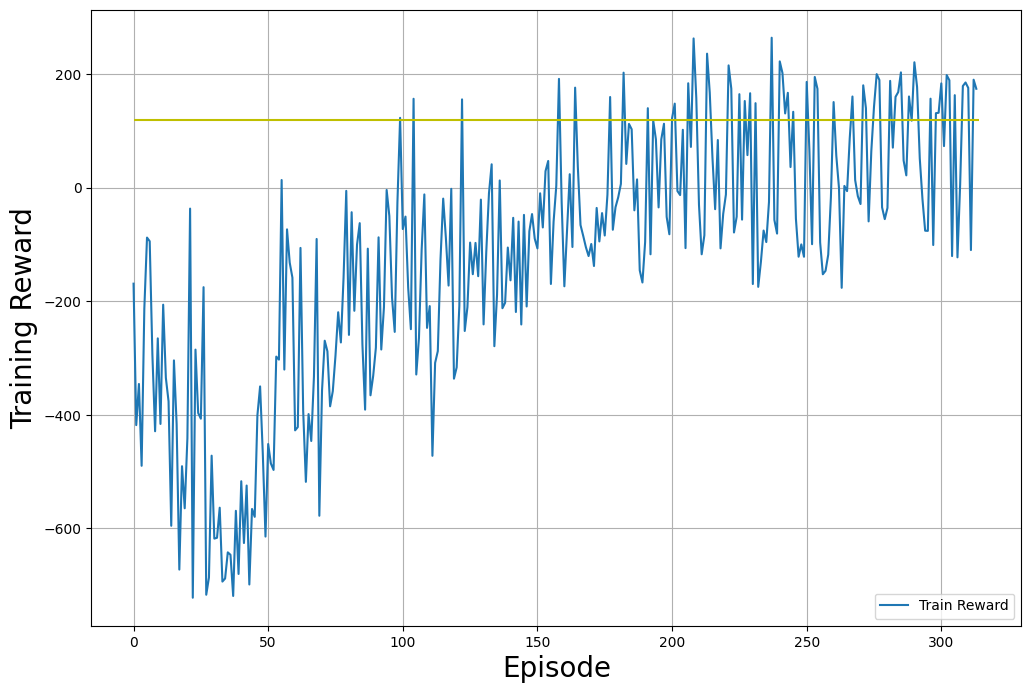

In [ ]:
#@title A2C Model Training
import os
import numpy as np
import gymnasium as gym
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.activations import relu, softmax
from typing import List, Tuple
import keras
import time
import matplotlib.pyplot as plt

gdrive_path='/content/gdrive/MyDrive/Colab Notebooks/DRL/project/models'
gdrive_videos_path='/content/gdrive/MyDrive/Colab Notebooks/DRL/project/videos'
algorithm = 'a2c'

####################
# Helper Functions #
####################
def numpy_to_tensor(x: np.ndarray) -> tf.Tensor:
    """
        Converts a NumPy array to a TensorFlow tensor
    """
    return tf.convert_to_tensor(x, dtype=tf.float32)


class ActorCriticNetwork():
    """
        A combined Advantage Actor-Critic model. This model contains separate
        neural networks for the Actor (ie. policy estimation) and the Critic
        ie. value estimation). Furthermore, it includes a Memory class for
        storing trajectories, as well as a 'train' function to update both
        networks.
    """

    class Savable():
        def save(self, path: str):
            pass
        def load(self, path: str):
            pass

    class Actor(tf.keras.Model, Savable):
        """
            Neural network that maps states to action probs
        """
        def __init__(self,
                     state_dim: int,
                     n_actions: int,
                     epsilon: float,
                     load_model: bool=False) -> None:
            """
                Init the actor model

                params:
                - state_dim : dimension of the input state
                - n_actions : number of discrete possible actions
                - epsilon : small value added to probs for stability (avoid log(0))
                - load_model : whether to load the model from drive or not
            """
            super().__init__()

            self.state_dim = state_dim
            self.n_actions = n_actions

            if load_model:
                self.model = self.load(f"{gdrive_path}/{algorithm}")
            else:
                self.model = models.Sequential([
                    layers.Dense(128, activation=relu),
                    layers.Dense(64, activation=relu),
                    layers.Dense(self.n_actions, activation=softmax)
                ])

        def call(self, X: tf.Tensor) ->  tf.Tensor:
            """
                Performs a forward pass through the network

                params:
                - X : Input state tensor

                returns:
                - Tensor of action probs
            """
            return self.model(X)

        def compute_loss(self,
                         log_probs: tf.Tensor,
                         advantage: tf.Tensor,
                         beta: float,
                         entropies: tf.Tensor) -> tf.Tensor:
            """
                Computes the actor loss using the policy gradient with entropy
                regularization

                The computed loss encourages actions that result in larger
                advantages and promotes exploration by maximizing entropy

                Advantage is treated as a fixed value to prevent the actor from
                influencing the critic learning

                params:
                - log_probs : Log probabilities of the selected actions
                - advantage : Tensor containing the advantage values (Q(s, a) - V(s))
                - beta : Entropy regularization value
                - entropies : Entropy of the action distributions

                returns:
                - Tensor representing the total actor loss
            """

            return -tf.reduce_mean(log_probs * tf.stop_gradient(advantage)) - beta * tf.reduce_mean(entropies)

        def save(self, path: str):
            """
                Saves the actor model at the given path

                params:
                - path : The path to save the model
            """
            full_path = f'{path}/actor.keras'
            os.makedirs(os.path.dirname(full_path), exist_ok=True)
            self.model.save(full_path)

        def load(self, path: str) -> keras.Model:
            """
                Loads the model from the specified path

                params:
                - path : The path to load the model from

                returns:
                - The loaded keras model
            """
            return keras.models.load_model(f'{path}/actor.keras')

        def choose_action(self, state: tf.Tensor) -> tuple[int, tf.Tensor]:
            """
                Chooses an action based on the policy distribution predicted by
                the actor model

                params:
                - state : The current state of the environment

                returns:
                - action : An integer index representing the selected action
                - probs  : The prob distribution over actions
            """
            # convert state to tensor and get action probs
            state_tensor = tf.expand_dims(state, axis=0)
            probs = tf.squeeze(self.call(state_tensor))

            # select an action from the categorical distribution
            action_dist = tf.random.categorical(tf.math.log([probs]), 1)[0, 0]
            action = int(action_dist.numpy())

            return action, probs

    class Critic(tf.keras.Model, Savable):
        """
            Neural network that maps states to state-value estimates
        """
        def __init__(self, state_dim: int, load_model: bool=False) -> None:
            """
                Init the critic model

                params:
                - state_dim : dimension of the input state
                - load_model : whether to load the model from drive or not
            """
            super().__init__()

            if load_model:
                self.model = self.load(f'{gdrive_path}/{algorithm}')
            else:
                self.model = models.Sequential([
                    layers.Dense(128, activation=relu),
                    layers.Dense(64, activation=relu),
                    layers.Dense(1)
                ])

        def call(self, X: tf.Tensor) ->  tf.Tensor:
            """
                Performs a forward pass through the network

                params:
                - X : Input state tensor

                returns:
                - Tensor containing the estimated state value
            """
            return self.model(X)

        def compute_loss(self, advantage: tf.Tensor) -> tf.Tensor:
            """
                Computes the critic loss as the MSE of the advantage

                Advantage is the diff between the estimated return (Q-val)
                and the predicted value (V(s)) from the critic

                This function implements standard MSE loss, which is used
                to train the critic to more accurately estimate V(s)

                params:
                - advantage : Tensor containing the advantage values
                              (Q(s, a) - V(s))

                returns:
                - Tensor representing the MSE loss
            """
            return tf.reduce_mean(tf.square(advantage))

        def save(self, path: str):
            """
                Saves the critic model at the given 'path'

                params:
                - path : The path to save the model
            """
            full_path = f'{path}/critic.keras'
            os.makedirs(os.path.dirname(full_path), exist_ok=True)
            self.model.save(full_path)

        def load(self, path: str) -> keras.Model:
            """
                Loads the model from the specified path

                params:
                - path : The path to load the model from

                returns:
                - The loaded keras model
            """
            return keras.models.load_model(f'{path}/critic.keras')


    class Memory():
        """
            Stores the episode trajectories (states, actions, rewards, dones, entropies)
            collected during training
        """

        def __init__(self) -> None:
            """
                Inits memory buffers for storing transitions
            """

            self.states = []
            self.actions = []
            self.rewards = []
            self.dones = []
            self.entropies = []

        def add(self,
                state: np.ndarray,
                action: int,
                reward: float,
                done: bool,
                entropy: tf.Tensor) -> None:
            """
                Adds a transition to the memory buffer

                params:
                - state : The observed state
                - action : The action taken
                - reward : The reward received
                - done : Whether the episode terminated or not
                - entropy : The entropy of the action distribution
            """

            self.states.append(state)
            self.actions.append(action)
            self.rewards.append(reward)
            self.dones.append(done)
            self.entropies.append(entropy)

        def clear(self) -> None:
            """
                Clears all of the stored transitions
            """

            self.states.clear()
            self.actions.clear()
            self.rewards.clear()
            self.dones.clear()
            self.entropies.clear()

        def _zip(self) -> zip:
            """
                Zip the stored transitions to be iterated over

                returns:
                - Zipped iterator
            """

            return zip(self.states,
                       self.actions,
                       self.rewards,
                       self.dones,
                       self.entropies)

        def reversed(self) -> List[Tuple[np.ndarray, int, float, bool, tf.Tensor]]:
            """
                Reverses the stored transitions and returns it

                returns:
                - List of tuples representing reversed memory buffer
            """
            return list(self._zip())[::-1]

        def __len__(self) -> int:
            """
                returns:
                - The number of transitions stored
            """

            return len(self.rewards)

    def __init__(self,
                 state_dim: int,
                 n_actions: int,
                 alr: float = 1e-3,
                 clr: float = 1e-3,
                 gamma: float = 0.99,
                 beta: float = 1e-2,
                 epsilon: float = 1e-10,
                 max_grad_norm: float = 1.0,
                 load_models: bool=False) -> None:
        """
            Init the Actor-Critic network and optimizers

            params:
            - state_dim : Dimension of the input state space
            - n_actions : Number of possible actions
            - alr : Actor learning rate
            - clr : Critic learning rate
            - gamma : Discount factor
            - beta : Entropy regularization value
            - epsilon : Small value added to probs for stability (to avoid log(0))
            - max_grad_norm : max allowed value for gradients;
                              gradients larger than this are clipped to prevent
                              instability
            - load_models : whether to load the previously saved models or not
        """

        # save the hyperparameters
        self.alr = alr
        self.clr = clr
        self.gamma = gamma
        self.beta = beta
        self.epsilon = epsilon
        self.max_grad_norm = max_grad_norm

        # init actor and critic networks
        self.actor = self.Actor(state_dim, n_actions, epsilon, load_model=load_models)
        self.critic = self.Critic(state_dim, load_model=load_models)

        # init Adam optimizers for both networks
        self.actor_optimizer = optimizers.Adam(learning_rate=self.alr)
        self.critic_optimizer = optimizers.Adam(learning_rate=self.clr)

        # init memory buffer for storing episode transitions
        self.memory = self.Memory()

    def choose_action(self, state: tf.Tensor) -> tuple[int, tf.Tensor]:
        """
            Chooses an action using the actor model given the current state

            params:
            - state : The current state of the environment

            returns:
            - Tuple of action, probs
        """
        return self.actor.choose_action(state)

    def train(self, q_val: float) -> Tuple[tf.Tensor, tf.Tensor]:
        """
            Trains the actor and critic networks using stored memory

            params:
            - q_val : Final estimated value for the last state

            returns:
            - Tuple of actor and critic loss (for logging/debugging)
        """

        # convert stored memory to tensors
        states = tf.convert_to_tensor(self.memory.states, dtype=tf.float32)
        actions = tf.convert_to_tensor(self.memory.actions, dtype=tf.int32)
        entropies = tf.stack(self.memory.entropies)
        q_vals = np.zeros((len(self.memory), 1))

        # compute discounted returns in reverse
        for i, (_, _, reward, done, _) in enumerate(self.memory.reversed()):
            q_val = reward + self.gamma * q_val * (1.0 - done)
            q_vals[len(self.memory) - 1 - i] = q_val

        q_vals = tf.convert_to_tensor(q_vals, dtype=tf.float32)

        #################
        # Critic update #
        #################
        with tf.GradientTape() as tape:
            # get current value estimates
            values = tf.squeeze(self.critic(states), axis=1)
            # compute advantage
            advantage = tf.squeeze(q_vals, axis=1) - values
            # compute MSE loss
            critic_loss = self.critic.compute_loss(advantage)
        grads = tape.gradient(critic_loss, self.critic.trainable_variables)
        # apply gradient clipping to improve stability
        grads = [tf.clip_by_norm(grad, self.max_grad_norm) for grad in grads]
        self.critic_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

        ################
        # Actor update #
        ################
        with tf.GradientTape() as tape:
            probs = self.actor(states)
            # one-hot encode the actions
            action_masks = tf.one_hot(actions, depth=probs.shape[1])
            # compute log probabilities of actions for input states (using log likelihood)
            log_probs = tf.reduce_sum(action_masks * tf.math.log(probs + self.epsilon), axis=1)
            # normalize the advantage
            advantage_mean = tf.reduce_mean(advantage)
            advantage_std = tf.math.reduce_std(advantage)
            normalized_advantage = (advantage - advantage_mean) / (advantage_std + self.epsilon)
            # compute policy loss
            actor_loss = self.actor.compute_loss(log_probs, normalized_advantage, self.beta, entropies)
        grads = tape.gradient(actor_loss, self.actor.trainable_variables)
        # apply gradient clipping to improve stability
        grads = [tf.clip_by_norm(grad, self.max_grad_norm) for grad in grads]
        self.actor_optimizer.apply_gradients(zip(grads, self.actor.trainable_variables))

        return actor_loss, critic_loss

    def evaluate(self, env: gym.Env, max_steps: int) -> float:
        """
            Evaluates the performance of an Advantage Actor-Critic agent in the
            given Gym environment

            params:
            - env : The Gym environment to evaluate in
            - max_steps : Max number of steps to run in the episode

            returns:
            - episode_reward : Total accumulated reward during the episode
        """
        state, _ = env.reset()
        episode_reward = 0
        for _ in range(max_steps):
            action, _ = self.choose_action(state)
            state, reward, done, truncated, _ = env.step(action)
            finished = done or truncated
            episode_reward += reward

            if finished:
                break

        return episode_reward

    def save_models(self) -> None:
        """
            Saves the actor and critic models to GDrive

            Depends on global variables 'gdrive_path' and 'algorithm'
        """
        self.actor.save(f'{gdrive_path}/{algorithm}')
        self.critic.save(f'{gdrive_path}/{algorithm}')


# init the LunarLander environment
env, folder_name = create_environment('LunarLander-v3')
env_test = gym.make('LunarLander-v3')

print(f'Training video directory name: {folder_name}\n')

# get env config
state_dim = env.observation_space.shape[0]
n_actions = env.action_space.n
max_steps_per_episode = env.spec.max_episode_steps

# define hyperparameters for training
n_episodes = 1000
n_steps = 20
actor_learning_rate = 1e-3
critic_learning_rate = 1e-3
gamma = 0.99
beta = 1e-3
epsilon = 1e-10
max_grad_norm = 1.0

load_models = False

# init actor-critic network
acn = ActorCriticNetwork(state_dim,
                         n_actions,
                         alr=actor_learning_rate,
                         clr=critic_learning_rate,
                         gamma=gamma,
                         beta=beta,
                         epsilon=epsilon,
                         max_grad_norm=max_grad_norm,
                         load_models=load_models)

best_reward = float('-inf')
train_rewards = []
test_rewards = []
begin = time.time()

for episode in range(n_episodes):
    done = False
    trunc = False
    train_total_reward = 0
    test_total_reward = 0
    state, _ = env.reset()
    steps = 0

    while not done and not trunc and steps < max_steps_per_episode:
        actor_loss = 0.0
        critic_loss = 0.0

        # convert state to tensor and get action probs
        state_tensor = numpy_to_tensor(state)
        # select an action from the categorical distribution
        action, probs = acn.choose_action(state_tensor)

        # compute entropy of the distribution
        entropy = -tf.reduce_sum(probs * tf.math.log(probs + acn.epsilon))

        # perform action in env
        next_state, reward, done, trunc, _ = env.step(action)

        train_total_reward += reward
        steps += 1

        # store transition
        acn.memory.add(state, action, reward, done, entropy)

        # move to next state
        state = next_state

        # only train after fixed number of steps or end of an episode
        if done or trunc or (steps % n_steps == 0):
            if done or trunc:
                # if end of episode, value of next state should be zero
                next_value = 0.0
            else:
                # if still running, estimate value of next state
                next_value = tf.squeeze(acn.critic(tf.expand_dims(numpy_to_tensor(next_state), axis=0))).numpy()

            actor_loss, critic_loss = acn.train(next_value)
            acn.memory.clear()

    train_rewards.append(train_total_reward)

    # Evaluate and store rewards
    test_total_reward = acn.evaluate(env_test, max_steps_per_episode)
    test_rewards.append(test_total_reward)

    # Save best models
    if test_total_reward > best_reward:
        best_reward = test_total_reward
        print(f'New best reward: {best_reward:.2f}! Saving models...')
        acn.save_models()

    mean_train_scores = np.mean(train_rewards[-10:])
    mean_test_scores = np.mean(test_rewards[-10:])

    if episode % 5 == 0:
      print(
          f'Episode {episode + 1}/{n_episodes}, Mean Training Reward: {mean_train_scores:.2f}, Mean Test Reward: {mean_test_scores:.2f}, Elapsed: {(time.time()-begin)/60} minutes'
      )

    if mean_test_scores >= 120:
        print(f'Reached reward threshold in {episode} episodes. Ending training.')
        break

def plot_train_rewards(train_rewards, reward_threshold):
    plt.figure(figsize=(12, 8))
    plt.plot(train_rewards, label='Train Reward')
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Training Reward', fontsize=20)
    plt.hlines(reward_threshold, 0, len(train_rewards), color='y')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_train_rewards(train_rewards, 120)

In [ ]:
# Render a video with a trained A2C agent
display_lunarlander_video('/content/video/LunarLander-v3/61395704-c604-4089-b3ac-0d25343fccda/a2c_trained1.mp4')

# PPO
This is the Proximal Policy Optimization implementation for the LunarLander environment.

Environment Name: LunarLander-v3
Action Space: Discrete(4)
Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Max Episode Steps: 1000
Nondeterministic: False
Reward Threshold: 200
New best score: -69.4395915755419
New best score: -36.806032117555844
Episode:  10 | Mean Train Rewards: -289.2 | Mean Test Rewards: -282.0 | Elapsed: 0.3541959047317505 minutes
Episode:  20 | Mean Train Rewards: -242.2 | Mean Test Rewards: -218.9 | Elapsed: 0.5658857782681783 minutes
New best score: -11.141954578306326
Episode:  30 | Mean Train Rewards: -193.9 | Mean Test Rewards: -224.7 | Elapsed: 0.8297891179720561 minutes
Episode:  40 | Mean Train Rewards: -208.0 | Mean Test Rewards: -263.6 | Elapsed: 1.034093407789866 minutes
Episode:  50 | Mean Train Rewards: -275.0 | Mean Test Rewards: -247.7 | Elapsed: 1.2890499711036683 minutes
Episode:  

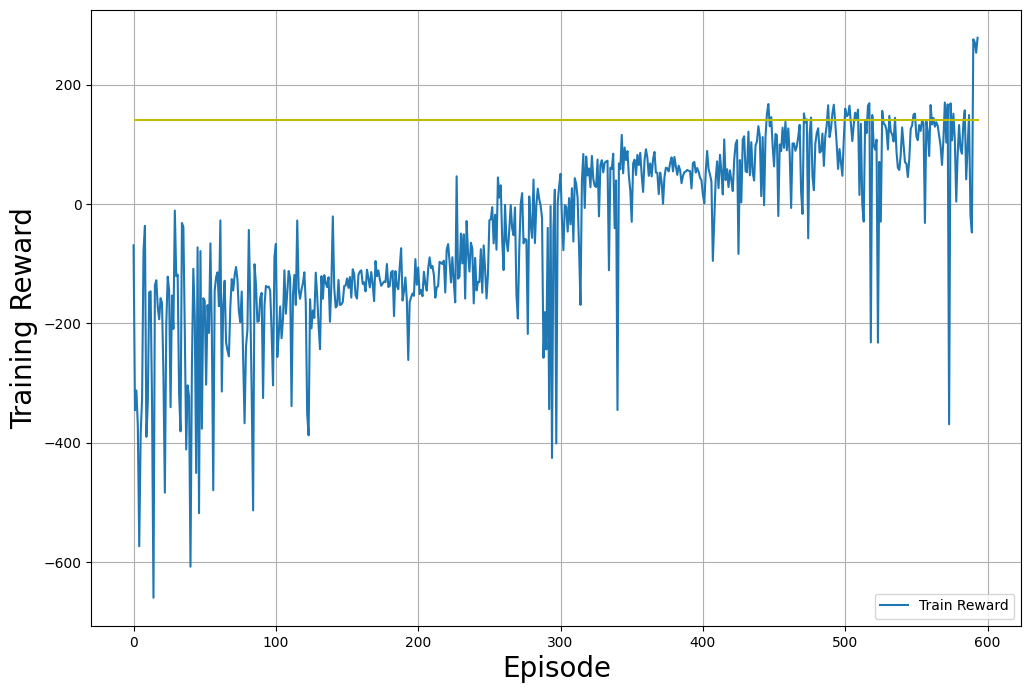

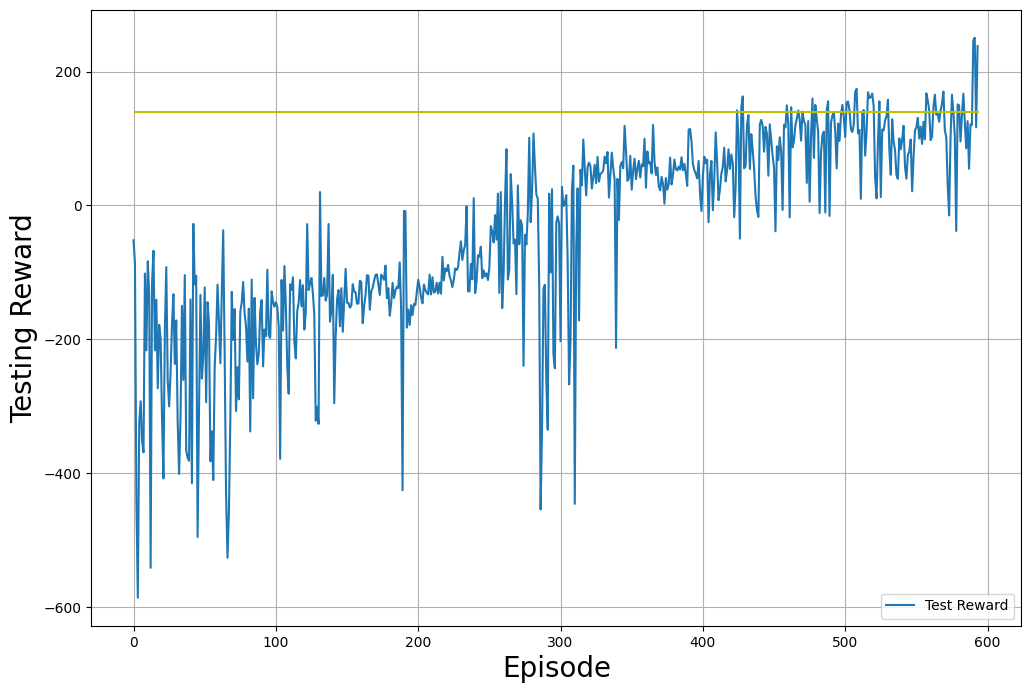

In [ ]:
#@title PPO Model Training
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import time

# Define the Actor network
def create_actor(state_dim, action_dim, hidden_dim):
    state_input = Input(shape=(state_dim,))
    x = Dense(hidden_dim, activation='relu')(state_input)
    x = Dense(hidden_dim, activation='relu')(x)
    action_output = Dense(action_dim, activation='softmax')(x)  # Softmax for probabilities
    actor = Model(inputs=state_input, outputs=action_output)
    return actor

# Define the Critic network
def create_critic(state_dim, hidden_dim):
    state_input = Input(shape=(state_dim,))
    x = Dense(hidden_dim, activation='relu')(state_input)
    x = Dense(hidden_dim, activation='relu')(x)
    value_output = Dense(1, activation='linear')(x)  # Linear for value estimation
    critic = Model(inputs=state_input, outputs=value_output)
    return critic

class PPO:
    def __init__(self, state_dim, action_dim, hidden_dim, lr_actor, lr_critic, epsilon, gamma, ppo_steps, entropy_coef):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.hidden_dim = hidden_dim
        self.epsilon = epsilon
        self.gamma = gamma
        self.ppo_steps = ppo_steps
        self.entropy_coef = entropy_coef

        self.actor = create_actor(state_dim, action_dim, hidden_dim)
        self.critic = create_critic(state_dim, hidden_dim)

        self.actor_optimizer = Adam(learning_rate=lr_actor)
        self.critic_optimizer = Adam(learning_rate=lr_critic)

    def choose_action(self, state):
        state = state.reshape(1, -1)  # Reshape for prediction
        action_probs = self.actor.predict_on_batch(state)[0]
        # action_probs = self.actor(state, training=False)[0]
        action = np.random.choice(self.action_dim, p=action_probs)
        return action

    def train(self, states, actions, old_action_probs, rewards, advantages):
        # One-hot encode actions
        actions_onehot = tf.one_hot(actions, self.action_dim)

        for _ in range(self.ppo_steps):
            with tf.GradientTape() as tape1, tf.GradientTape() as tape2:
                # Actor loss
                action_probs = self.actor(states)
                new_action_probs = tf.reduce_sum(action_probs * actions_onehot, axis=1)
                ratio = new_action_probs / old_action_probs
                surrogate_loss1 = ratio * advantages
                surrogate_loss2 = tf.clip_by_value(ratio, 1 - self.epsilon, 1 + self.epsilon) * advantages
                actor_loss = -tf.reduce_mean(tf.minimum(surrogate_loss1, surrogate_loss2))

                # Add entropy bonus
                entropy = -tf.reduce_sum(action_probs * tf.math.log(action_probs + 1e-10), axis=1)  # Avoid log(0)
                actor_loss -= self.entropy_coef * tf.reduce_mean(entropy)

                # Critic loss
                values = self.critic(states)
                critic_loss = tf.reduce_mean(tf.square(rewards - values))

            # Apply gradients
            actor_grads = tape1.gradient(actor_loss, self.actor.trainable_variables)
            self.actor_optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

            critic_grads = tape2.gradient(critic_loss, self.critic.trainable_variables)
            self.critic_optimizer.apply_gradients(zip(critic_grads, self.critic.trainable_variables))

# Training loop
def run_ppo(agent, env_train, env_test, max_episodes, max_steps_per_episode, discount_factor, reward_threshold, print_interval, n_trials):
    train_rewards = []
    test_rewards = []
    begin = time.time()
    best_score = -np.inf

    for episode in range(1, max_episodes + 1):
        states, actions, old_action_probs, rewards, dones = [], [], [], [], []
        state, _ = env_train.reset()
        episode_reward = 0

        for step in range(max_steps_per_episode):
            action = agent.choose_action(state)
            next_state, reward, done, truncated, _ = env_train.step(action)
            finished = done or truncated

            states.append(state)
            actions.append(action)
            rewards.append(reward)
            dones.append(finished)

            # Get old action probabilities for the current state
            state_tensor = state.reshape(1, -1)  # Reshape for prediction
            old_action_probs.append(agent.actor.predict_on_batch(state_tensor)[0][action])

            state = next_state
            episode_reward += reward

            if finished:
                break

        # Calculate value estimations, advantages, and returns
        values = agent.critic.predict_on_batch(np.array(states))
        returns = calculate_returns(rewards, dones, discount_factor, values)  # Pass dones
        advantages = calculate_advantages(returns, values)

        # Train the agent
        agent.train(np.array(states), np.array(actions), np.array(old_action_probs), returns, advantages)

        # Evaluate and store rewards
        if episode_reward > best_score:
            print(f'New best score: {episode_reward}')
            best_score = episode_reward

        train_rewards.append(episode_reward)
        test_reward = evaluate(agent, env_test, max_steps_per_episode)
        test_rewards.append(test_reward)

        mean_train_rewards = np.mean(train_rewards[-n_trials:])
        mean_test_rewards = np.mean(test_rewards[-n_trials:])

        if episode % print_interval == 0:
          print(f'Episode: {episode:3} | Mean Train Rewards: {mean_train_rewards:3.1f} | Mean Test Rewards: {mean_test_rewards:3.1f} | Elapsed: {(time.time()-begin)/60} minutes')

        if mean_test_rewards >= reward_threshold:
          print(f'Reached reward threshold in {episode} episodes')
          break

    return train_rewards, test_rewards

# Helper functions for calculating returns and advantages
def calculate_returns(rewards, dones, discount_factor, values):
    returns = np.zeros_like(rewards, dtype=np.float32)
    running_add = 0
    for t in reversed(range(len(rewards))):
        running_add = rewards[t] + (1 - dones[t]) * discount_factor * running_add
        returns[t] = running_add
    # Normalize returns
    # returns = (returns - np.mean(returns)) / (np.std(returns) + 1e-8)
    return returns

def calculate_advantages(returns, values):
    advantages = returns - values.flatten()
    # Normalize advantages
    # advantages = (advantages - np.mean(advantages)) / (np.std(advantages) + 1e-8)
    return advantages

def evaluate(agent, env, max_steps):
    state, _ = env.reset()
    episode_reward = 0
    for _ in range(max_steps):
        action = agent.choose_action(state)
        state, reward, done, truncated, _ = env.step(action)
        finished = done or truncated
        episode_reward += reward
        if finished:
            break
    return episode_reward

# Plotting functions
def plot_train_rewards(train_rewards, reward_threshold):
    plt.figure(figsize=(12, 8))
    plt.plot(train_rewards, label='Train Reward')
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Training Reward', fontsize=20)
    plt.hlines(reward_threshold, 0, len(train_rewards), color='y')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

def plot_test_rewards(test_rewards, reward_threshold):
    plt.figure(figsize=(12, 8))
    plt.plot(test_rewards, label='Test Reward')
    plt.xlabel('Episode', fontsize=20)
    plt.ylabel('Testing Reward', fontsize=20)
    plt.hlines(reward_threshold, 0, len(test_rewards), color='y')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


# wrap the train env to record video
env_train, _ = create_environment('LunarLander-v3')
env_test = gym.make('LunarLander-v3')

# Hyperparameters and training
state_dim = env_train.observation_space.shape[0]
action_dim = env_train.action_space.n
hidden_dim = 64
lr_actor = 0.003
lr_critic = 0.001
epsilon = 0.2
gamma = 0.99
ppo_steps = 8
entropy_coef = 0.01
max_episodes = 700
max_steps_per_episode = 500
reward_threshold = 120
print_interval = 10
n_trials = 15

agent = PPO(state_dim, action_dim, hidden_dim, lr_actor, lr_critic, epsilon, gamma, ppo_steps, entropy_coef)
train_rewards, test_rewards = run_ppo(agent, env_train, env_test, max_episodes, max_steps_per_episode, gamma, reward_threshold, print_interval, n_trials)

# Plot results
plot_train_rewards(train_rewards, reward_threshold)
plot_test_rewards(test_rewards, reward_threshold)

# Generate video of 1 episode using latest trained agent
env_train.start_recording(video_name="ppo_trained")
evaluate(agent, env_train, max_steps_per_episode)
env_train.stop_recording()

In [ ]:
# Render video of the trained PPO agent
display_lunarlander_video('ppo_trained.mp4')

## cleanup

In [ ]:
# cleanup videos
!rm -rf ./video/LunarLander-v3/*